## Use MNIST dataset 
The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

In [1]:
## Load libraries

import pandas as pd
import livelossplot
import keras
from keras import Sequential
import matplotlib.pyplot as plt

In [30]:
## Download Dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [29]:
#from keras.datasets import cifar100
#(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 11s 0us/step


In [16]:
## Prepare dataset ## Normalize 
### Scale the image values so that the focus is on the difference between pixel values within images, not between value variation across images 
### #shape the data into arrays with the image sizes, one channel because this is greyscale data
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

(60000, 28, 28, 1)
(60000,)

digit =  9


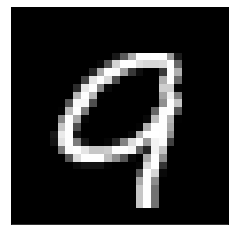

In [18]:
print(x_train.shape)
print(y_train.shape)

#pick an number to display one of the images
image=3000
#use matplotlib to plot an image
picture = x_train[image]
picture = picture.reshape(28,28) 

# Display the labelled digit for the picture
lbl = y_train[image]
print("\ndigit = ", lbl)

# Print a 'picture' of the number
plt.imshow(picture, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show() 

Define Your Convolutional Neural Network
Build the CNN with the layers:

In [21]:
# Add layersfrom keras.models import Sequential
model = Sequential()

### Convolutional Layers ###
# Convolutional Layer
from keras.layers import Conv2D
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))

# Max Pooling layer
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2, 2)))

#add flattening layer
from keras.layers import Flatten
model.add(Flatten())


### 'ANN Layers' ###
#add a dense layer
from keras.layers import Dense
model.add(Dense(units=128, activation='relu'))

#add softmax activation on dense layer for output
model.add(Dense(units=10, activation='softmax'))

In [23]:
## Choose Hyperparameter
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


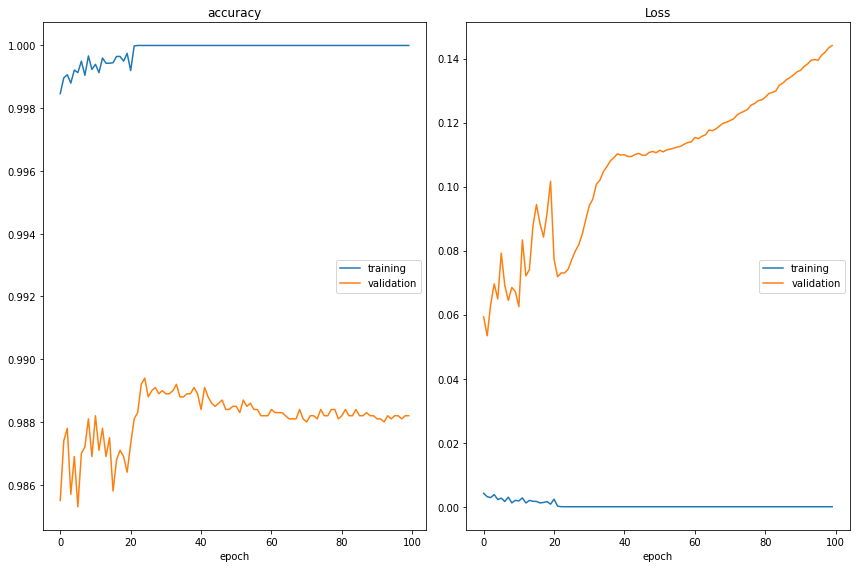

accuracy
	training         	 (min:    0.998, max:    1.000, cur:    1.000)
	validation       	 (min:    0.985, max:    0.989, cur:    0.988)
Loss
	training         	 (min:    0.000, max:    0.004, cur:    0.000)
	validation       	 (min:    0.053, max:    0.144, cur:    0.144)


In [25]:
##Training Network
from livelossplot import PlotLossesKeras

model.fit(x_train, y_train,
          epochs=100,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [26]:
#pull the loss and accuracy from the model
loss, accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1441 - accuracy: 0.9882


In [27]:
##Retrain after adding anither hidden layer
# Add layersfrom keras.models import Sequential
model = Sequential()

### Convolutional Layers ###
# Convolutional Layer
from keras.layers import Conv2D
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))

# Max Pooling layer
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2, 2)))

#add flattening layer
from keras.layers import Flatten
model.add(Flatten())


### 'ANN Layers' ###
#add a dense layer
from keras.layers import Dense
model.add(Dense(units=128, activation='relu'))

#add a dense hidden layer
model.add(Dense(units=64, activation='relu'))

#add softmax activation on dense layer for output
model.add(Dense(units=10, activation='softmax'))

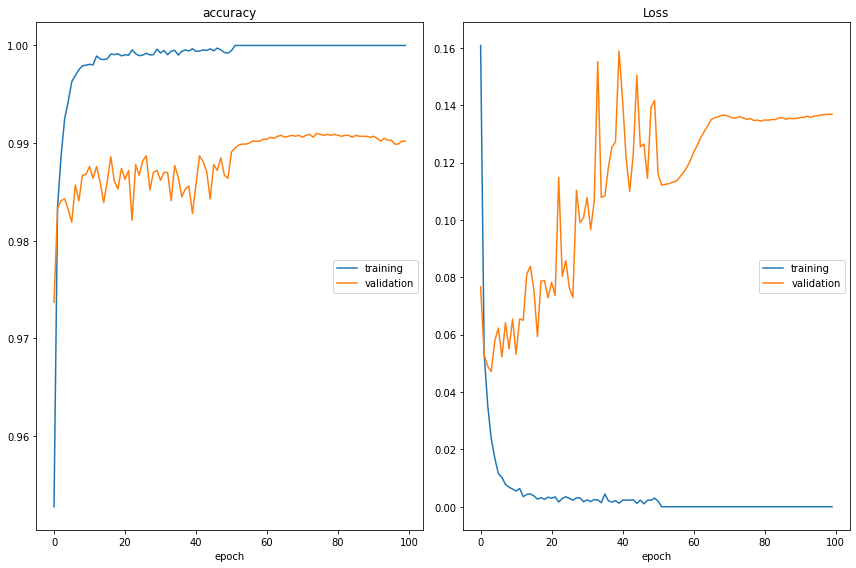

accuracy
	training         	 (min:    0.953, max:    1.000, cur:    1.000)
	validation       	 (min:    0.974, max:    0.991, cur:    0.990)
Loss
	training         	 (min:    0.000, max:    0.161, cur:    0.000)
	validation       	 (min:    0.047, max:    0.159, cur:    0.137)


In [28]:
## Choose Hyperparameter
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##Training Network
from livelossplot import PlotLossesKeras

model.fit(x_train, y_train,
          epochs=100,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

### Test Results:

Using the hyperparameters defined in the miniproject and adding another hidden layer we were the accuracy increased from 0.98 to 0.99.